# Exercise 5.24

In [1]:
import pathlib
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def load_data() -> pd.DataFrame:
    # Five types of overtime hours for the Madison, Wisconsin, Police.
    fpth = pathlib.Path(r'..\..\data\Table5.8.xlsx')
    return pd.read_excel(fpth)

In [3]:
overtime_df = load_data()[['Holdover Hours', 'COA Hours']]
overtime_df.head(3)

,Holdover Hours,COA Hours
0,1181,14861
1,3532,11367
2,2502,13329


In [4]:
n, p = overtime_df.shape
xbar = np.mean(overtime_df, axis=0)
xbar

Holdover Hours     2676.875
COA Hours         13563.625
dtype: float64

In [5]:
S = np.cov(overtime_df, rowvar=False)
S

array([[ 1458543.05      , -1113809.78333333],
       [-1113809.78333333,  1698324.38333333]])

$$
\begin{align*}
    \text{Upper control limit (UCL)} = \bar{\bar{x}} + \text{3(standard deviation)} \\
    \text{Lower control limit (LCL)} = \bar{\bar{x}} - \text{3(standard deviation)}
\end{align*}
$$
We have individual observations, $\bar{\bar{x}} = \bar{x}$.

In [6]:
# Create the confidence limits (3 standard deviations).
cl = xbar.to_numpy().reshape(p, 1) + np.array([-1, 1]) * (3 * np.sqrt(np.diag(S)))
cl

array([[ -946.22967003,  6586.4682589 ],
       [ 9940.52032997, 17473.2182589 ]])

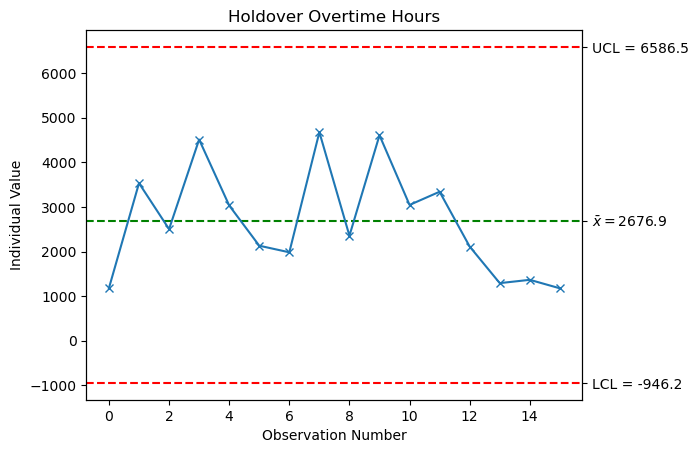

In [7]:
plt.figure()
ax = plt.gca()
plt.axhline(y=cl[0, 0], color='r', linestyle='--')
plt.axhline(y=xbar[0], color='g', linestyle='--')
plt.axhline(y=cl[0, 1], color='r', linestyle='--')
plt.plot(overtime_df['Holdover Hours'], marker='x')
plt.title('Holdover Overtime Hours')
plt.xlabel('Observation Number')
plt.ylabel('Individual Value')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim()) 
ax2.set_yticks([cl[0, 0], xbar[0], cl[0, 1]])
ax2.set_yticklabels([f'LCL = {cl[0, 0]:.1f}', f'$\\bar{{x}} = {xbar[0]:.1f}$', f'UCL = {cl[0, 1]:.1f}'])
plt.savefig('Question-5-24-Holdover.png', bbox_inches='tight')
plt.show()

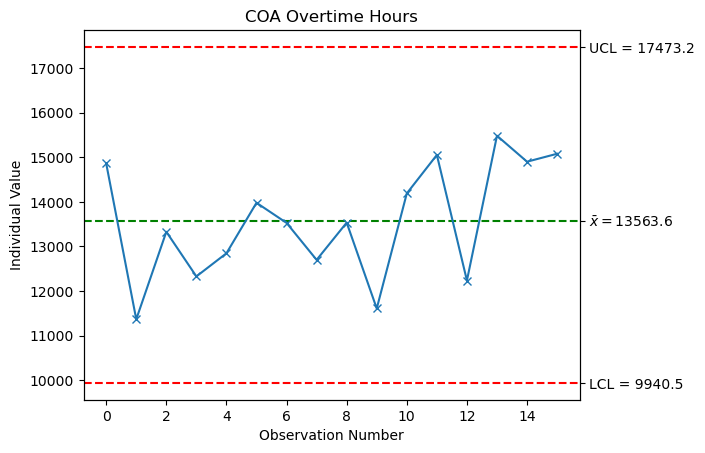

In [8]:
plt.figure()
ax = plt.gca()
plt.axhline(y=cl[1, 0], color='r', linestyle='--')
plt.axhline(y=xbar[1], color='g', linestyle='--')
plt.axhline(y=cl[1, 1], color='r', linestyle='--')
plt.plot(overtime_df['COA Hours'], marker='x')
plt.title('COA Overtime Hours')
plt.xlabel('Observation Number')
plt.ylabel('Individual Value')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim()) 
ax2.set_yticks([cl[1, 0], xbar[1], cl[1, 1]])
ax2.set_yticklabels([f'LCL = {cl[1, 0]:.1f}', f'$\\bar{{x}} = {xbar[1]:.1f}$', f'UCL = {cl[1, 1]:.1f}'])
plt.savefig('Question-5-24-COA.png', bbox_inches='tight')
plt.show()